In [119]:
# import the necessary packages
from ndl.preprocessing import ImageToArrayPreprocessor
from ndl.preprocessing import SimplePreprocessor
from ndl.datasets import SimpleDatasetLoader
from keras.models import load_model
from imutils import paths
import numpy as np
import argparse
import cv2

In [120]:
dataset = '../datasets/animals'
inputModel = 'shallow_weights.hdf5'

In [121]:
# initialize the class labels
classLabels = ["cat", "dog", "panda"]

In [122]:
# grab the list of images in the dataset then randomly sample
# indexes into the image paths list
print("[INFO] sampling images...")
imagePaths = np.array(list(paths.list_images(dataset)))
idxs = np.random.randint(0, len(imagePaths), size=(9,))
imagePaths = imagePaths[idxs]

[INFO] sampling images...


In [123]:
# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

In [124]:
# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=5)
data = data.astype("float") / 255.0

[INFO] processed 5/9


In [125]:
# load the pre-trained network
print("[INFO] loading pre-trained network...")
model = load_model(inputModel)

[INFO] loading pre-trained network...


In [126]:
# make predictions on the images
print("[INFO] predicting...")
preds = model.predict(data, batch_size=32).argmax(axis=1)

[INFO] predicting...


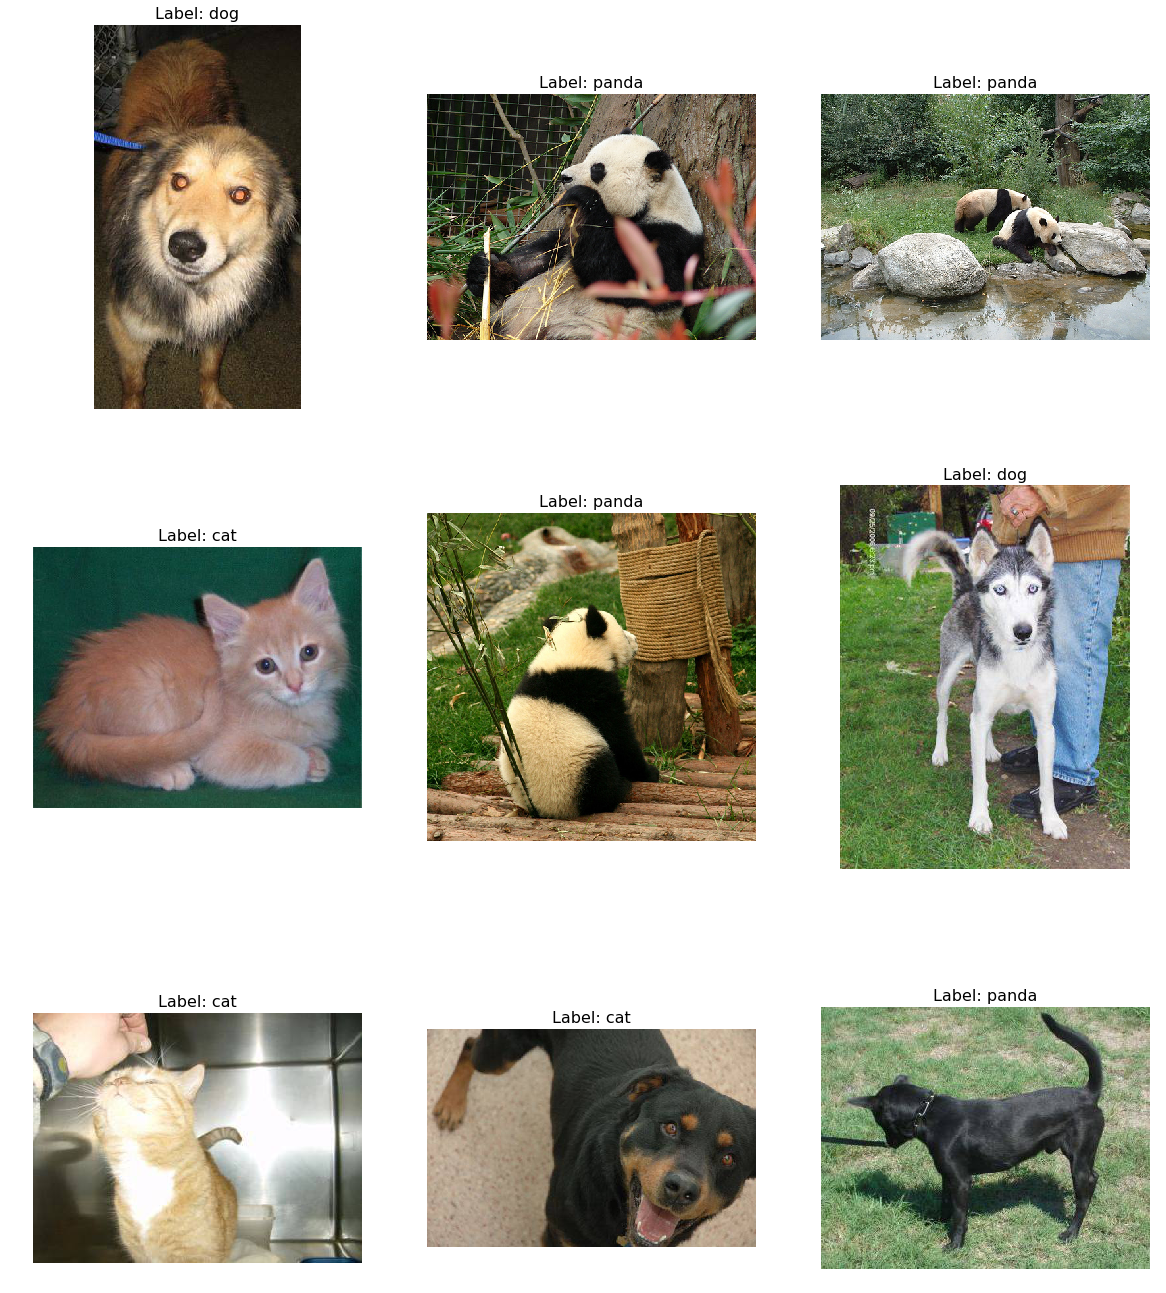

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,24))

def setupImage(title, image, index):
    # show the output images\n",
    ax = plt.subplot(330 + index + 1)
    ax.axis('off')
    ax.set_title(title, fontsize=16)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# loop over the sample images
for (i, imagePath) in enumerate(imagePaths):
    # load the example image, draw the prediction, and display it
    # to our screen
    image = cv2.imread(imagePath)
    setupImage("Label: {}".format(classLabels[preds[i]]), image, i)

plt.show()


Remember our model only has about 70% accuracy so you should expect a few images to be incorrectly classified.

An interesting technique is to be able to save the network after each epoch, allowing to checkpoint and choose the best performing one. This also allows to restart training from a specific point if our network starts showing signs of overfitting.